Importing Required libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('vgsales.csv')
df.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


EDA(Exploratory Data Analysis)


1) Checking the type and shape of dataset

In [4]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
df.shape

(16598, 11)

2) Cleaning/Removing/Dropping irrelevent columns/data

In [7]:
df = df.drop(columns=['Year','Genre'], axis = 1)

In [8]:
df.head(1)

,Rank,Name,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Nintendo,41.49,29.02,3.77,8.46,82.74


3) Cleanig/Removing/Dropping duplicate values

In [9]:
df_duplicate = df[df.duplicated()]
print(df_duplicate)

Empty DataFrame
Columns: [Rank, Name, Platform, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []


In [11]:
df.count()

Rank            16598
Name            16598
Platform        16598
Publisher       16540
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

In [12]:
df = df.drop_duplicates()
df.count()

Rank            16598
Name            16598
Platform        16598
Publisher       16540
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

4) Cleaning/Removing/Dropping null values

In [13]:
print(df.isnull().sum())

Rank             0
Name             0
Platform         0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64


In [14]:
df.count()

Rank            16598
Name            16598
Platform        16598
Publisher       16540
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

In [15]:
df = df.dropna()
df.count()

Rank            16540
Name            16540
Platform        16540
Publisher       16540
NA_Sales        16540
EU_Sales        16540
JP_Sales        16540
Other_Sales     16540
Global_Sales    16540
dtype: int64

Checking Outliers

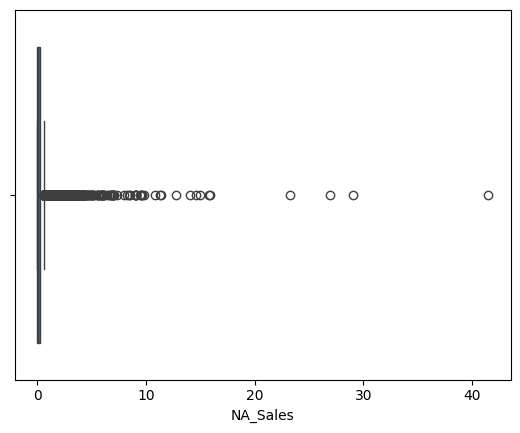

In [18]:
sns.boxplot(x='NA_Sales', data =df)
plt.show()

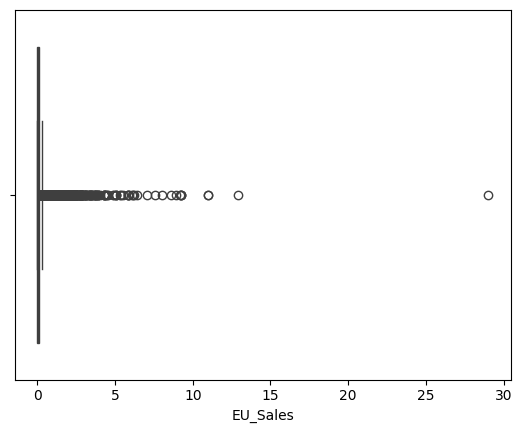

In [19]:
sns.boxplot(x='EU_Sales',data = df)
plt.show()

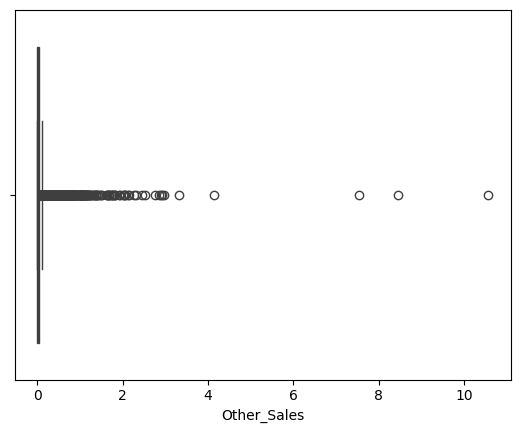

In [20]:
sns.boxplot(x='Other_Sales',data = df)
plt.show()

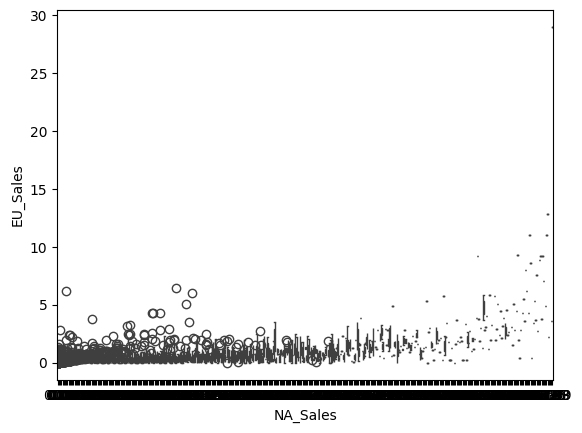

In [21]:
sns.boxplot(x='NA_Sales',y='EU_Sales',data = df)
plt.show()

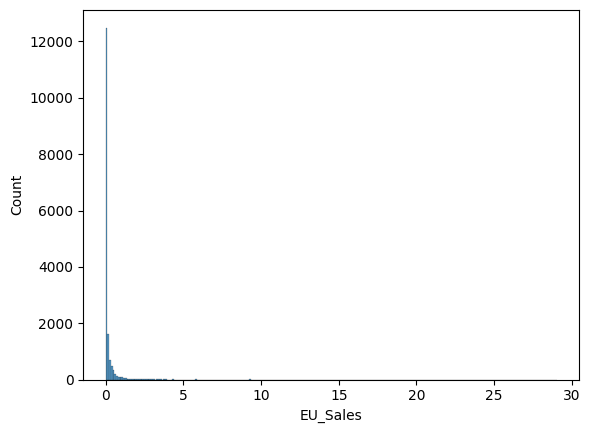

In [24]:
sns.histplot(x='EU_Sales',data = df)
plt.show()

Removing Outliers

In [26]:
Q1 = df.select_dtypes(include = np.number).quantile(0.25)
Q3 = df.select_dtypes(include = np.number).quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rank            8296.50
NA_Sales           0.24
EU_Sales           0.11
JP_Sales           0.04
Other_Sales        0.04
Global_Sales       0.42
dtype: float64


In [27]:
df = df[~((df.select_dtypes(include = np.number) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(include = np.number) > (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
Q1 = df.select_dtypes(include = np.number).quantile(0.25)
Q3 = df.select_dtypes(include = np.number).quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rank            6684.50
NA_Sales           0.15
EU_Sales           0.06
JP_Sales           0.01
Other_Sales        0.02
Global_Sales       0.20
dtype: float64


Correlation Heatmap

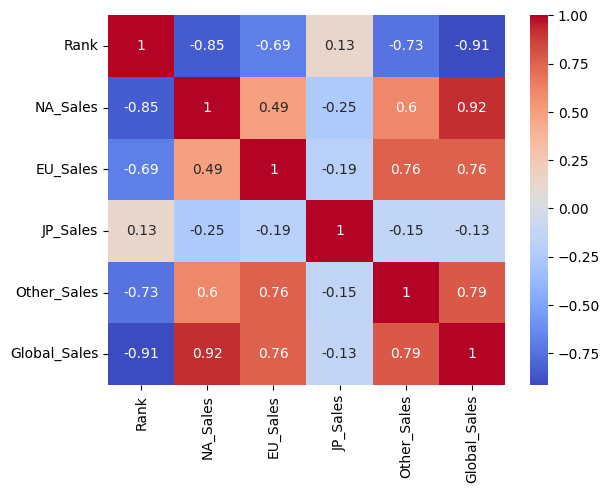

In [29]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()